In [27]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
from cv19gm.cv19sim import CV19SIM
import cv19gm.utils.cv19functions as cv19functions
import pandas as pd

# Simulation

# SEIRMETA

In [5]:
dictToSend = {
    "model2": {
        "model": {
            "name": "Example",
            "id": "1323455",
            "model": "SEIRMETA",
            "compartments": [
                "S",
                "E",
                "I",
                "R"
            ],
            "EDOs": True,
            "RBM": False,
            "RBM_N": 1
        },
        "data": {
            "datafile": False,
            "importdata": False,
            "initdate": "",
            "country": "USA",
            "state": "",
            "county": "",
            "healthservice": "",
            "loc_name": "",
            "geo_topology": "meta"
        },
        "parameters": {
            "static": {
                "t_init": 0,
                "t_end": 500,
                "mu": [
                    1.0,
                    0.8,
                    1.2
                ],
                "pI_det": 1,
                "k_I": 0,
                "k_R": 0,
            },
            "dynamic": {
                "beta": [
                    0.2,
                    0.15,
                    0.125
                ],
                "alpha": [
                    1,
                    1,
                    1
                ],
                "Phi": False,
                "tE_I": 5.0,
                "tI_R": 10.0,
                "rR_S": 0
            }
        },
        "initialconditions": {
            "I": [
                1000,
                0,
                1500
            ],
            "I_d": [
                100,
                0,
                150
            ],
            "I_ac": [
                4500,
                9000,
                6500
            ],
            "population": [
                100000,
                200000,
                150000
            ],
            "R": [
                5000,
                10000,
                7500
            ],
            "E": False,
            "E_d": False
        }
    }
} 

In [65]:
res = requests.post('http://localhost:5003/simulate_meta', json=dictToSend)
#res = requests.post('http://192.168.2.131:5003/simulate_meta', json=dictToSend)
#print('response from server:',res.text)
dictFromServer = res.json()

In [67]:
print(dictFromServer)

{'results': {'model2': '{"0": {"t": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214

In [68]:
response = json.loads(dictFromServer['results']['model2'])

In [70]:
response['1']['S']

[190000,
 189713,
 189421,
 189123,
 188827,
 188530,
 188227,
 187915,
 187601,
 187278,
 186951,
 186619,
 186282,
 185944,
 185595,
 185240,
 184878,
 184514,
 184142,
 183767,
 183384,
 182997,
 182597,
 182195,
 181787,
 181375,
 180953,
 180524,
 180089,
 179647,
 179195,
 178737,
 178271,
 177797,
 177314,
 176823,
 176324,
 175811,
 175296,
 174771,
 174239,
 173704,
 173155,
 172597,
 172029,
 171455,
 170877,
 170282,
 169677,
 169065,
 168444,
 167809,
 167169,
 166521,
 165865,
 165201,
 164528,
 163841,
 163142,
 162437,
 161725,
 161003,
 160277,
 159542,
 158801,
 158050,
 157290,
 156524,
 155758,
 154983,
 154193,
 153400,
 152599,
 151793,
 150982,
 150163,
 149336,
 148510,
 147681,
 146848,
 146011,
 145172,
 144331,
 143489,
 142645,
 141794,
 140945,
 140097,
 139247,
 138397,
 137547,
 136695,
 135848,
 135001,
 134157,
 133315,
 132474,
 131637,
 130805,
 129978,
 129152,
 128328,
 127511,
 126701,
 125893,
 125092,
 124298,
 123509,
 122725,
 121950,
 121180,
 

In [47]:
# Working with pandas dataframe
responsedf = pd.DataFrame(response)

<AxesSubplot:>

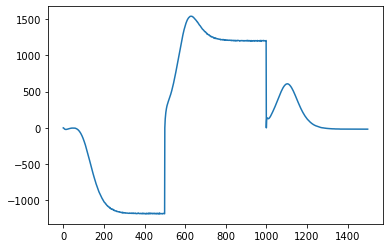

In [50]:
responsedf['R_d'].plot()

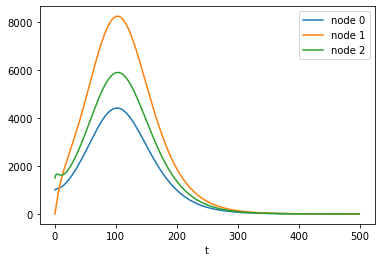

In [41]:
ax = plt.gca()
for i in range(len(responsedf['node'].drop_duplicates())):
    responsedf.loc[responsedf['node']==i].plot(x = 't',y='I',ax=ax,label='node '+str(i))

In [61]:
import datetime

In [63]:
datetime.datetime.now() + datetime.timedelta(days=4,hours=16,minutes=19)

datetime.datetime(2022, 8, 2, 11, 59, 28, 575736)